### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [25]:
import pandas as pd
#1-

df = pd.read_csv (r"C:\Users\delma\OneDrive\Bureau\my_project_pytho_II\data (3).csv")
df.head()


,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [26]:
#2-

df["date"] = pd.to_datetime(df["date"], format="%Y-%m")
df["mese_numeric"] = (df["date"].dt.year - 1949) * 12 + df["date"].dt.month
df


,date,passengers,mese_numeric
0,1949-01-01,112.0,1
1,1949-02-01,118.0,2
2,1949-03-01,132.0,3
3,1949-04-01,129.0,4
4,1949-05-01,121.0,5
...,...,...,...
127,1960-08-01,606.0,140
128,1960-09-01,508.0,141
129,1960-10-01,461.0,142
130,1960-11-01,NaN,143


Pendenza       : 31.487
Intercept    : -61259.213
R²          : 0.844
P-value     : 2.2813736130232264e-54
Erreur std. : 1.185
Con il nostro R^2 = 0.844 e P-value = 2.2813736130232264e-54, ppossiamo concludere che il modello spiega bene i nostri dati
Possiamo concludere che esiste una forte relazione lineare positiva tra 'passengers' e 'date': ad ogni aumento di 'date', 'passengers' tende a aumentare fortemente.


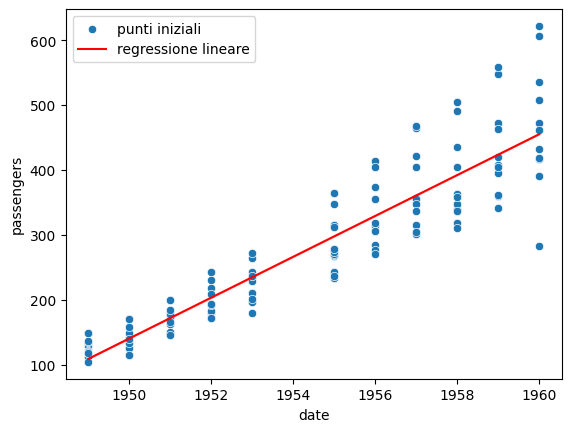

In [27]:
#3-
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import linregress

df["passengers"] = df["passengers"].fillna(df["passengers"].mean())
df.isna().sum()
x = df["date"].dt.year
x.value_counts()
y = df["passengers"]
sns.scatterplot(x=x, y=y, label = 'punti iniziali')
coef = np.polyfit(x=x, y=y, deg=1)
coef
y_pred = np.polyval(coef, x)
# y_pred
sns.lineplot(x=x, y=y_pred, color='red', label = 'regressione lineare')

mod = linregress(x=x, y=y)
print(f"Pendenza       : {mod.slope:.3f}")
print(f"Intercept    : {mod.intercept:.3f}")
print(f"R²          : {mod.rvalue**2 :.3f}")
print(f"P-value     : {mod.pvalue:}")
print(f"Erreur std. : {mod.stderr:.3f}")
print("Con il nostro R^2 = {} e P-value = {}, ppossiamo concludere che il modello spiega bene i nostri dati".format(round(mod.rvalue**2,3),mod.pvalue))
print("Possiamo concludere che esiste una forte relazione lineare positiva tra 'passengers' e 'date': ad ogni aumento di 'date', 'passengers' tende a aumentare fortemente.")

In [28]:
#4-
RMSE = np.sqrt((np.sum((y - y_pred)**2)) / len(y) )
print("il RMSE VALE:",RMSE)

il RMSE VALE: 48.68470467903062


In [29]:
import plotly.express as px

# px.scatter(x, y)
# px.line(x, y_pred)
a, b = np.polyfit(x, y, 1)
y_pred = a * x + b
data = pd.DataFrame({
    'x': np.concatenate([x, x]),
    'y': np.concatenate([y, y_pred]),
    'Tipo': ['Datti reali'] * len(x) + ['Curva stimata'] * len(x)
})
fig = px.scatter(data, x='x', y='y', color='Tipo', title="Datti reali e Curva stimata")
fig.update_traces(mode='markers + lines')  # Affiche les points + lignes
fig.show()

# from IPython.display import Image, display

# display(Image(filename="C:\\Users\\delma\\Downloads\\newplot.png"))


### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [30]:
#1-
x = np.linspace(-3, 3, 100)
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [31]:

#2-
rumore = np.random.normal(0,1, 100)
y = x**3 - x + rumore
y

array([-2.16731317e+01, -2.15477729e+01, -2.05214816e+01, -2.10423681e+01,
       -1.73954060e+01, -1.73963382e+01, -1.47863013e+01, -1.48389613e+01,
       -1.35680925e+01, -1.14560698e+01, -1.12009887e+01, -9.30608738e+00,
       -1.08282191e+01, -9.32628534e+00, -7.06675923e+00, -7.03324961e+00,
       -6.28576625e+00, -5.08646844e+00, -6.37505309e+00, -4.18611646e+00,
       -2.26367573e+00, -3.63294935e+00, -2.78693017e+00, -3.36893299e+00,
       -1.27574099e+00, -3.01092072e+00,  9.29468357e-02,  3.86371274e-01,
       -1.00518471e+00,  2.00133467e-01, -1.23846463e+00,  1.11616808e+00,
        2.25241962e+00,  1.65604677e+00,  9.02085864e-01, -1.53690476e+00,
        4.13555454e-01, -3.58212040e-01,  4.82029898e-01, -2.22966665e-01,
        2.34437687e+00, -6.20458672e-01,  8.87362074e-03,  1.85751452e+00,
       -1.53209731e-01, -1.33533552e+00,  1.36926151e+00,  7.72431341e-01,
        1.54289483e+00,  9.51714302e-01,  2.02128245e+00,  5.14541521e-01,
       -6.69948989e-02,  

In [32]:
X=x.reshape(-1,1)
X


array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [33]:
#3-

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("scegliere un gradro"),

    dcc.Slider(
    id="numero_slider",
    min = 1,
    max=10,
    step = 1,
    value = 2,
    marks= {i: str(i) for i in range(1,11)}
    ),

    html.Br(),

    dcc.Graph(id="output_grado"),
    

])

@app.callback(
    Output("output_grado", "figure"),
    Input("numero_slider", "value")
)

def cerca_grado(valore):
            # coeffs = np.polyfit(x=x,y=y, deg= valore)
            # y_predite = np.polyval(coeffs, x) 

            # fig = go.Figure()

            # fig.add_trace(go.Scatter(x=x, y=y, mode = 'markers',   name='dati iniziali',  marker=dict(color='blue'))),
            # fig.add_trace( go.Scatter(x=x, y=y_predite, mode = 'lines', line=dict(color='red', width=2)))
            ##return fig

    poly = PolynomialFeatures(degree=valore)
    x_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_predit = model.predict(x_poly)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode = 'markers',   name='dati iniziali',  marker=dict(color='blue'))),
    fig.add_trace(go.Scatter(x=x, y=y_predit, mode = 'lines', line=dict(color='red', width=2)))
    return fig

if __name__ == '__main__':
    app.run(debug=True)
